In [1]:
import cv2 as cv 
import numpy as np
import scipy
import PIL.Image
import os
import scipy
import matplotlib
%matplotlib inline
import pylab as plt

In [2]:
test_dir = '/data/uts521/zzd/DukeMTMC/bounding_box_train/'

#------------load points-------------
import json
with open('./result/train_points.json','r') as fp:
    points = json.load(fp)
    
#------------load heatmaps------------ 
#It may take ten minutes to load. So we skip it this time.
#import pickle
#with open('./result/train_heatmaps.pickle','rb') as handle:
 #   heatmaps = pickle.load(handle)  #load heatmaps
    

In [3]:
for (k,v) in points.iteritems():
    img_path = test_dir + k + '.jpg'
    print(img_path)
    peak18 = v
    print(peak18) #18 points. If not detected (i.e. nose), we will use empty list [].
    break  #Here we just test the first image

/data/uts521/zzd/DukeMTMC/bounding_box_train/3621_c4_f0093619.jpg
[[[38, 19, 0.6031557023525238, 0]], [[35, 30, 0.5988258272409439, 1]], [[21, 29, 0.5439753979444504, 2]], [[12, 51, 0.520618125796318, 3]], [[7, 70, 0.5099335312843323, 4]], [[49, 30, 0.5295887738466263, 5]], [[54, 51, 0.4191095158457756, 6]], [[52, 70, 0.37287645414471626, 7]], [[24, 75, 0.41991516202688217, 8]], [[24, 108, 0.3685068394988775, 9]], [[23, 139, 0.3161145728590782, 10]], [[42, 76, 0.42249906808137894, 11]], [[39, 108, 0.4242425709962845, 12]], [[37, 137, 0.38039322569966316, 13]], [[36, 16, 0.6157343089580536, 14]], [[41, 16, 0.5841058641672134, 15]], [[31, 16, 0.5657321363687515, 16]], []]


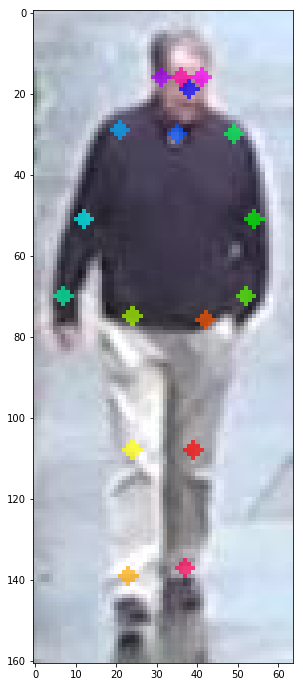

In [4]:
# visualize
colors = [[255, 0, 0], [255, 85, 0], [255, 170, 0], [255, 255, 0], [170, 255, 0], [85, 255, 0], [0, 255, 0], \
          [0, 255, 85], [0, 255, 170], [0, 255, 255], [0, 170, 255], [0, 85, 255], [0, 0, 255], [85, 0, 255], \
          [170, 0, 255], [255, 0, 255], [255, 0, 170], [255, 0, 85]]
cmap = matplotlib.cm.get_cmap('hsv')

oriImg = cv.imread(img_path) 
canvas = cv.imread(img_path) # B,G,R order

#plt.imshow(canvas[:,:,[2,1,0]])

for i in range(18):
    rgba = np.array(cmap(1 - i/18. - 1./36))
    rgba[0:3] *= 255
    for j in range(len(peak18[i])):
        cv.circle(canvas, tuple(peak18[i][j][0:2]), 2, colors[i], thickness=-1)

to_plot = cv.addWeighted(oriImg, 0.3, canvas, 0.7, 0)
plt.imshow(to_plot[:,:,[2,1,0]])
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 12)